In [35]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
import h5py
import math
%matplotlib inline
from scipy.stats import skew 
from scipy.stats import kurtosis 

In [3]:
X = rand.randn(10000)

In [5]:
t = np.linspace(3, 5, num = 10000)

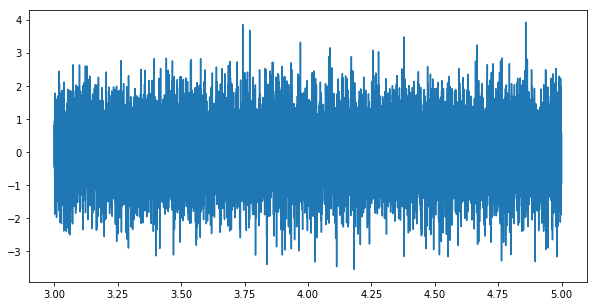

In [7]:
plt.figure(figsize = (10, 5))
plt.plot(t, X)

In [9]:
M = np.mean(X)
M

-0.006232962241837555

In [20]:
M1 = np.sum(X)/len(t)
M1

-0.006232962241837555

In [21]:
D = np.var(X)
D


0.9888900368375798

In [22]:
D1 = np.sum(abs(X - X.mean())**2)/len(t-1)
D1

0.9888900368375798

In [28]:
a = np.mean((X-X.mean())**3)/((np.var(X)/math.sqrt(np.var(X)))**3)

In [29]:
a

-0.011455205504956498

In [32]:
skew(X)

-0.011455205504956502

In [34]:
e = np.mean((X-X.mean())**4)/((np.var(X)/math.sqrt(np.var(X)))**4)
e

2.928721147572342

In [37]:
kurtosis(X, fisher = False)

2.928721147572343

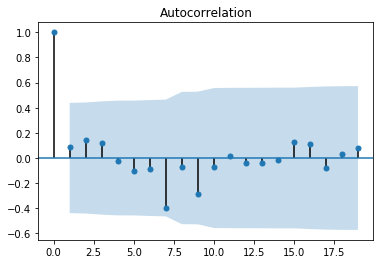

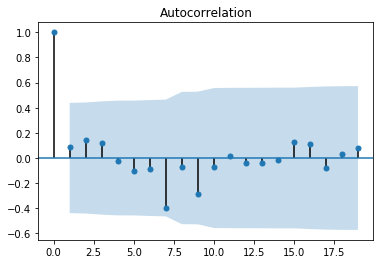

In [68]:
plot_acf(X[0:20])

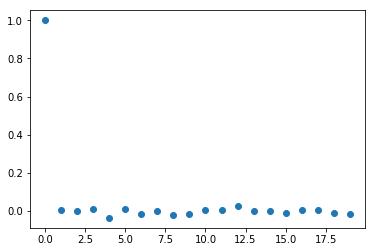

In [98]:
r1 = np.correlate(X, X, mode = 'full')
r10= r1[(np.size(r1)) // 2:] / np.max(r1)

plt.plot(r10[0:20], 'o')

In [125]:
r2 = np.zeros(20)
n= len(X)
for l in range(20):
        r2[l] = ((n-l)*np.sum(X[:n-l]*X[l:]) - (np.sum(X[:n-l]))*(np.sum(X[l:])))/(np.sqrt((n-l)*(np.sum((X[:n-l])**2))-((np.sum((X[:n-l])))**2)))/(np.sqrt((n-l)*np.sum((X[l:])**2)-(np.sum(X[l:]))**2))
print(r2)

[ 1.00000000e+00  2.83998848e-03  4.27433342e-04  8.62687277e-03
 -3.64404854e-02  1.14889075e-02 -1.39538079e-02 -1.15755167e-03
 -2.23000813e-02 -1.52225665e-02  3.89136287e-03  6.78734217e-03
  2.38289164e-02 -1.42758186e-03  2.59132165e-04 -9.76888500e-03
  6.68422484e-03  2.63534505e-03 -1.15763982e-02 -1.51232148e-02]


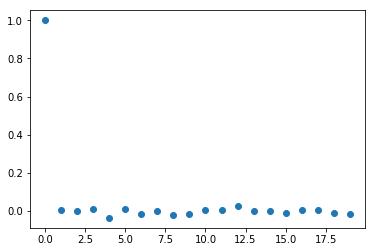

In [126]:
plt.plot(r2, 'o')

In [141]:
def func(row):
    M = np.mean(row)
    D = np.var(row)
    a = skew(row)
    e= kurtosis(row, fisher = False)
    print('Математическое ожидание', M, D, a, e)
    plot_acf(row[0:20])

In [142]:
Xmat = h5py.File('7.mat', 'r')
Xmat = Xmat.get('z7')
Xmat = np.array(Xmat)

Математическое ожидание -0.001557861952419557 0.039177888441022414 [0.13879103] [2.98077911]


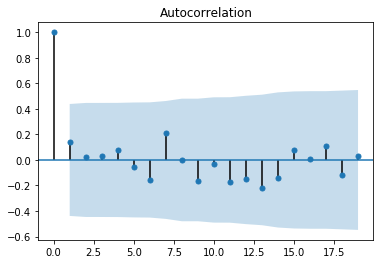

In [143]:
func(Xmat)

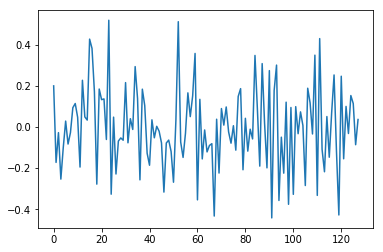

In [145]:
plt.plot(Xmat)